In [102]:
from scipy.stats import pearsonr
from numpy.random import randn
import itertools
import pandas as pd

In [103]:
df = pd.read_csv("C:/Users/Dell/Downloads/hurricanes.csv")
df.head()

,Month,"""Average""","""2005""","""2006""","""2007""","""2008""","""2009""","""2010""","""2011""","""2012""","""2013""","""2014""","""2015"""
0,May,0.1,0,0,1,1,0,0,0,2,0,0,0
1,Jun,0.5,2,1,1,0,0,1,1,2,2,0,1
2,Jul,0.7,5,1,1,2,0,1,3,0,2,2,1
3,Aug,2.3,6,3,2,4,4,4,7,8,2,2,3
4,Sep,3.5,6,4,7,4,2,8,5,2,5,2,5


### Method 1

In [96]:
pearsoncorr = df.corr(method='pearson').abs()
pearsoncorr

,"""Average""","""2005""","""2006""","""2007""","""2008""","""2009""","""2010""","""2011""","""2012""","""2013""","""2014""","""2015"""
"""Average""",1.000000,0.797036,0.828640,0.811917,0.915250,0.773243,0.980373,0.763659,0.556134,0.878517,0.749046,0.788098
"""2005""",0.797036,1.000000,0.464172,0.367342,0.835060,0.704401,0.778703,0.605386,0.548555,0.669594,0.946629,0.377318
"""2006""",0.828640,0.464172,1.000000,0.851688,0.735417,0.623285,0.762073,0.893198,0.411150,0.829228,0.433682,0.952579
"""2007""",0.811917,0.367342,0.851688,1.000000,0.626347,0.369575,0.829157,0.576308,0.132904,0.846667,0.379840,0.888568
"""2008""",0.915250,0.835060,0.735417,0.626347,1.000000,0.842978,0.859561,0.827490,0.658194,0.701532,0.846299,0.643356
"""2009""",0.773243,0.704401,0.623285,0.369575,0.842978,1.000000,0.679842,0.797598,0.854160,0.449356,0.619166,0.550782
"""2010""",0.980373,0.778703,0.762073,0.829157,0.859561,0.679842,1.000000,0.645502,0.508091,0.873698,0.756550,0.724882
"""2011""",0.763659,0.605386,0.893198,0.576308,0.827490,0.797598,0.645502,1.000000,0.599944,0.655612,0.573178,0.795592
"""2012""",0.556134,0.548555,0.411150,0.132904,0.658194,0.854160,0.508091,0.599944,1.000000,0.215862,0.552730,0.224356
"""2013""",0.878517,0.669594,0.829228,0.846667,0.701532,0.449356,0.873698,0.655612,0.215862,1.000000,0.598026,0.801784


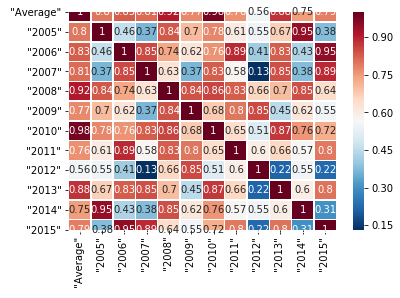

In [93]:
#visualizing the matrix
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [105]:
import numpy as np
columns = np.full((pearsoncorr.shape[0],), True, dtype=bool)

#setting the column value from default True to False which matches the condition correlation > 0.85
for i in range(pearsoncorr.shape[0]):
    for j in range(i+1, pearsoncorr.shape[0]):
        if pearsoncorr.iloc[i,j] > 0.85:
            if columns[j]:
                columns[j] = False

df = df[pearsoncorr.columns]
selected_columns = df.columns[columns]
print(selected_columns)
df = df[selected_columns]
df.head()

Index([' "Average"', ' "2005"', ' "2006"', ' "2009"'], dtype='object')


,"""Average""","""2005""","""2006""","""2009"""
0,0.1,0,0,0
1,0.5,2,1,0
2,0.7,5,1,0
3,2.3,6,3,4
4,3.5,6,4,2


### Method 2

In [104]:
# Select upper triangle of correlation matrix
upper = pearsoncorr.where(np.triu(np.ones(pearsoncorr.shape),
                                  k=1).astype(np.bool))
#print(); print(upper)

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
#print(); print(to_drop)

# Drop Marked Features
df1 = df.drop(columns = to_drop, axis=1)
print(); print(df1)


  Month   "Average"   "2005"   "2006"   "2009"
0   May         0.1        0        0        0
1   Jun         0.5        2        1        0
2   Jul         0.7        5        1        0
3   Aug         2.3        6        3        4
4   Sep         3.5        6        4        2
5   Oct         2.0        8        0        2
6   Nov         0.5        3        0        1
7   Dec         0.0        1        0        0


### Method 3

In [101]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

correlation(df,0.85)

  Month   "Average"   "2005"   "2006"   "2009"
0   May         0.1        0        0        0
1   Jun         0.5        2        1        0
2   Jul         0.7        5        1        0
3   Aug         2.3        6        3        4
4   Sep         3.5        6        4        2
5   Oct         2.0        8        0        2
6   Nov         0.5        3        0        1
7   Dec         0.0        1        0        0
